In [168]:
# http://matplotlib.org/examples/api/barchart_demo.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [169]:
import pandas as pd

df_lexrank= pd.DataFrame(mat_lexrank)
df_lexrank.to_csv('lexrank_results.csv')

df_concept= pd.DataFrame(mat_concept)
df_concept.to_csv('concept_results.csv')

df_CSTSumm= pd.DataFrame(mat_CSTSumm)
df_CSTSumm.to_csv('CSTSumm_results.csv')

lexrank_mean=df_lexrank.mean().to_dict()
concept_mean=df_concept.mean().to_dict()
CSTSumm_mean=df_CSTSumm.mean().to_dict()

#bar_plot(lexrank_mean, CSTSumm_mean, concept_mean)

In [142]:
df_lexrank = pd.concat([df_text_leg,df_lexrank], axis=1)
df_concept = pd.concat([df_text_leg,df_concept], axis=1)
df_CSTSumm = pd.concat([df_text_leg,df_CSTSumm], axis=1)

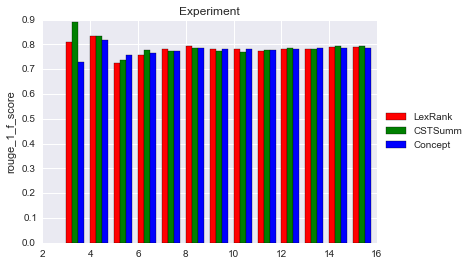

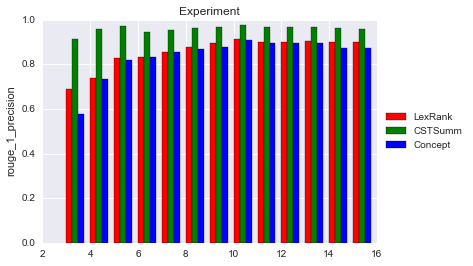

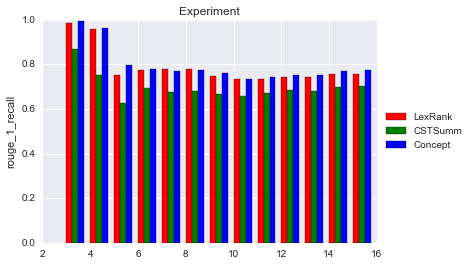

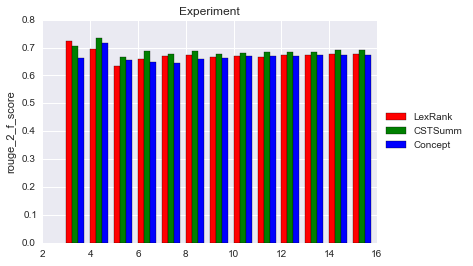

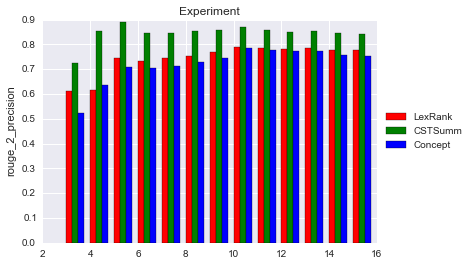

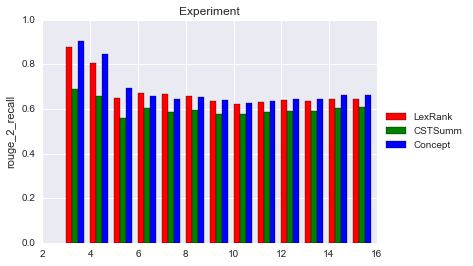

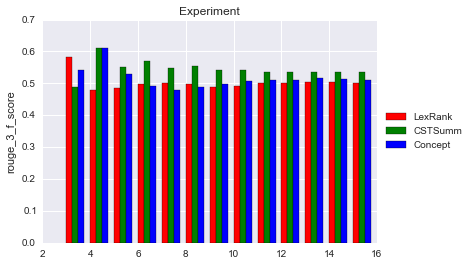

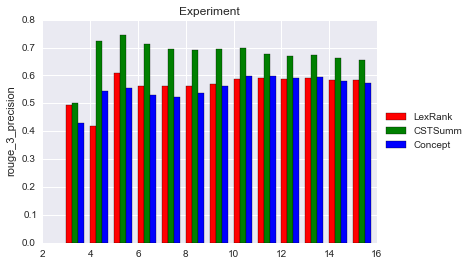

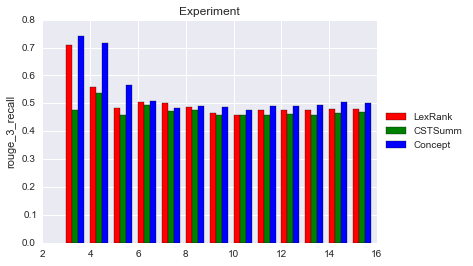

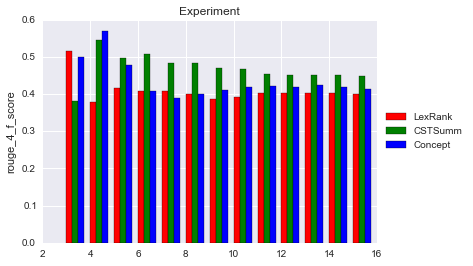

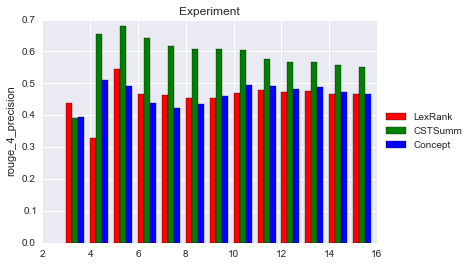

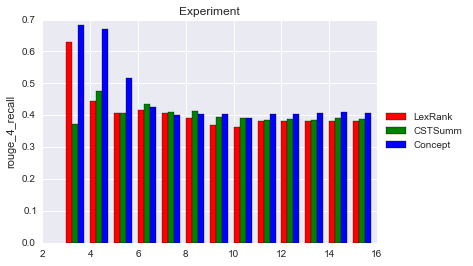

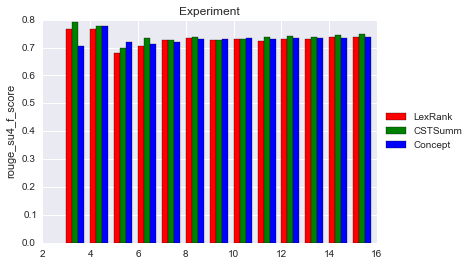

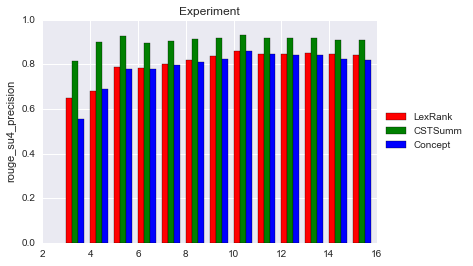

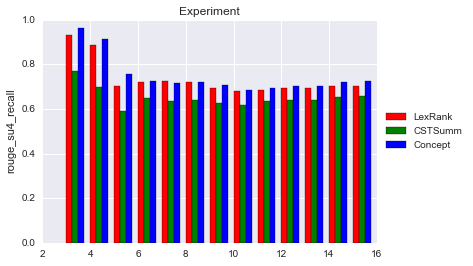

In [167]:

len(text)

leng=[]
for i in text:
    #print )
    dic={}
    dic['text_leng']=len(i.split())
    leng.append(dic)

#plt.hist(leng)

df_text_leg=pd.DataFrame(leng)



#result.plot(x='text_leng', y='rouge_su4_precision')
#result.head()

step=100
i=0

for c in np.array(df_concept.columns):

    width = 0.25    
    if "text_leng" not in c:

        datax_LexRank=[]
        datay_LexRank=[]
        datax_CSTSumm=[]
        datay_CSTSumm=[]
        datax_Concept=[]
        datay_Concept=[]

    
    
        for i in xrange(16):
            datax_LexRank.append(i)
            datay_LexRank.append(df_lexrank[df_lexrank['text_leng']<=i*step][c].mean())
            
            datax_CSTSumm.append(i+width)
            datay_CSTSumm.append(df_CSTSumm[df_CSTSumm['text_leng']<=i*step][c].mean())
            
            datax_Concept.append(i+width+width)
            datay_Concept.append(df_concept[df_concept['text_leng']<=i*step][c].mean())
            
            
            
        N = 15
        ind = np.arange(N)  # the x locations for the groups
           # the width of the bars
        fig, ax = plt.subplots()
        #print df_lexrank.sort_values('text_leng')[c].values
        rects1 = ax.bar(datax_LexRank, datay_LexRank, width, color='r')
        rects2 = ax.bar(datax_CSTSumm, datay_CSTSumm, width, color='g')
        rects3 = ax.bar(datax_Concept, datay_Concept, width, color='b')
        # add some text for labels, title and axes ticks
        ax.set_ylabel(c)
        ax.set_title('Experiment')
        #ax.set_xticks(ind + width)
        #label = ax.set_xticklabels(datax)
        #plt.setp(label, rotation=90)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        ax.legend((rects1[0],rects2[0], rects3[0]), ('LexRank', 'CSTSumm', 'Concept'), loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
